In [1]:
import tensorflow as tf
from tensorflow.keras import models, layers
import matplotlib.pyplot as plt

In [2]:
img_size = 256
b_size = 16
CHANNELS = 3
EPOCHS = 1000

In [3]:
dataset = tf.keras.preprocessing.image_dataset_from_directory(
    "Images",
    shuffle = True,
    image_size = (img_size, img_size),
    batch_size = b_size
)

Found 720 files belonging to 3 classes.


In [4]:
class_names = dataset.class_names
class_names

['jeans', 'sarees', 'trousers']

In [5]:
len(dataset)

45

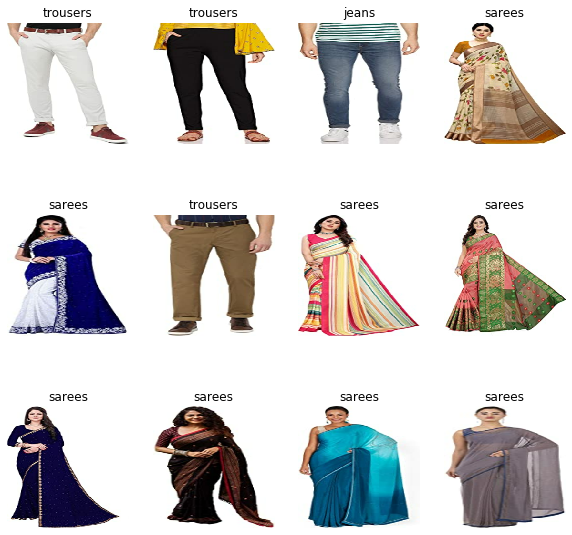

In [6]:
plt.figure(figsize = (10, 10))
for image_batch, label_batch in dataset.take(1):
    for i in range(12):
        plt.subplot(3, 4, i+1)
        plt.imshow(image_batch[i].numpy().astype("uint8"))
        plt.title(class_names[label_batch[i]])
        plt.axis('off')
    

In [7]:
def get_dataset_partitions_tf(ds, train_split = 0.8, val_split = 0.1, test_split = 0.1, shuffle = True, shuffle_size = 10000):
    ds_size = len(ds)
    
    if shuffle:
        ds = ds.shuffle(shuffle_size, seed = 12)
        
    train_size = int(train_split * ds_size)
    val_size = int(val_split * ds_size)
    
    train_ds = ds.take(train_size)
    
    val_ds = ds.skip(train_size).take(val_size)
    test_ds = ds.skip(train_size).skip(val_size)
    
    return train_ds, val_ds, test_ds

In [8]:
train_ds, val_ds, test_ds = get_dataset_partitions_tf(dataset)

In [9]:
len (train_ds)

36

In [10]:
len(val_ds)

4

In [11]:
len(test_ds)

5

In [12]:
train_ds = train_ds.cache().shuffle(1000)
val_ds = val_ds.cache().shuffle(1000)
test_ds = test_ds.cache().shuffle(1000)

In [13]:
resize_and_rescale = tf.keras.Sequential([
    layers.experimental.preprocessing.Resizing(img_size, img_size),
    layers.experimental.preprocessing.Rescaling(1.0/255)
])

In [14]:
data_augmentation = tf.keras.Sequential([
    layers.experimental.preprocessing.RandomFlip("horizontal_and_vertical"),
    layers.experimental.preprocessing.RandomRotation(0.2),
])

In [15]:
input_shape = (b_size, img_size, img_size, CHANNELS)
n_classes = 3

model = models.Sequential([
    resize_and_rescale,
    data_augmentation,
    layers.Conv2D(32, (3, 3), activation = 'relu', input_shape = input_shape),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, kernel_size = (3,3), activation = 'relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, kernel_size = (3,3), activation = 'relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3,3), activation = 'relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3,3), activation = 'relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3,3), activation = 'relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Flatten(),
    layers.Dense(64, activation = 'relu'),
    layers.Dense(n_classes, activation = 'softmax')
])

model.build(input_shape = input_shape)

In [16]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
sequential (Sequential)      (16, 256, 256, 3)         0         
_________________________________________________________________
sequential_1 (Sequential)    (16, 256, 256, 3)         0         
_________________________________________________________________
conv2d (Conv2D)              (16, 254, 254, 32)        896       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (16, 127, 127, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (16, 125, 125, 64)        18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (16, 62, 62, 64)          0         
_________________________________________________________________
conv2d_2 (Conv2D)            (16, 60, 60, 64)         

In [17]:
model.compile(
    optimizer = 'adam',
    loss = tf.keras.losses.SparseCategoricalCrossentropy(from_logits = False),
    metrics = ['accuracy']
)

In [18]:
history = model.fit(
    train_ds,
    epochs = EPOCHS,
    batch_size = b_size,
    verbose = 1,
    validation_data = val_ds
)

Epoch 1/1000
36/36 [==============================] - 23s 614ms/step - loss: 1.0230 - accuracy: 0.4531 - val_loss: 0.7315 - val_accuracy: 0.6562
Epoch 2/1000
36/36 [==============================] - 22s 601ms/step - loss: 0.7239 - accuracy: 0.6545 - val_loss: 1.3464 - val_accuracy: 0.5469
Epoch 3/1000
36/36 [==============================] - 22s 599ms/step - loss: 0.6426 - accuracy: 0.6701 - val_loss: 0.4717 - val_accuracy: 0.7969
Epoch 4/1000
36/36 [==============================] - 22s 602ms/step - loss: 0.5819 - accuracy: 0.7170 - val_loss: 0.7292 - val_accuracy: 0.5156
Epoch 5/1000
36/36 [==============================] - 22s 597ms/step - loss: 0.6327 - accuracy: 0.6736 - val_loss: 0.4151 - val_accuracy: 0.8594
Epoch 6/1000
36/36 [==============================] - 22s 601ms/step - loss: 0.5066 - accuracy: 0.7795 - val_loss: 0.4070 - val_accuracy: 0.8438
Epoch 7/1000
36/36 [==============================] - 22s 599ms/step - loss: 0.4537 - accuracy: 0.7986 - val_loss: 0.3070 - val_ac

36/36 [==============================] - 23s 629ms/step - loss: 0.2213 - accuracy: 0.9062 - val_loss: 0.1666 - val_accuracy: 0.9219
Epoch 114/1000
36/36 [==============================] - 23s 631ms/step - loss: 0.2144 - accuracy: 0.9080 - val_loss: 0.1797 - val_accuracy: 0.9219
Epoch 115/1000
36/36 [==============================] - 23s 639ms/step - loss: 0.1962 - accuracy: 0.9219 - val_loss: 0.1111 - val_accuracy: 0.9531
Epoch 116/1000
36/36 [==============================] - 23s 627ms/step - loss: 0.2133 - accuracy: 0.9062 - val_loss: 0.2332 - val_accuracy: 0.8906
Epoch 117/1000
36/36 [==============================] - 22s 600ms/step - loss: 0.2205 - accuracy: 0.8976 - val_loss: 0.1762 - val_accuracy: 0.9062
Epoch 118/1000
36/36 [==============================] - 22s 598ms/step - loss: 0.1851 - accuracy: 0.9236 - val_loss: 0.1695 - val_accuracy: 0.9062
Epoch 119/1000
36/36 [==============================] - 22s 612ms/step - loss: 0.1893 - accuracy: 0.9236 - val_loss: 0.0901 - val_acc

Epoch 169/1000
36/36 [==============================] - 22s 625ms/step - loss: 0.1598 - accuracy: 0.9358 - val_loss: 0.1078 - val_accuracy: 0.9375
Epoch 170/1000
36/36 [==============================] - 22s 611ms/step - loss: 0.1428 - accuracy: 0.9392 - val_loss: 0.1610 - val_accuracy: 0.9375
Epoch 171/1000
36/36 [==============================] - 22s 605ms/step - loss: 0.1666 - accuracy: 0.9271 - val_loss: 0.1589 - val_accuracy: 0.9219
Epoch 172/1000
36/36 [==============================] - 22s 618ms/step - loss: 0.1681 - accuracy: 0.9392 - val_loss: 0.1320 - val_accuracy: 0.9531
Epoch 173/1000
36/36 [==============================] - 22s 607ms/step - loss: 0.1532 - accuracy: 0.9253 - val_loss: 0.1486 - val_accuracy: 0.9219
Epoch 174/1000
36/36 [==============================] - 22s 605ms/step - loss: 0.1450 - accuracy: 0.9410 - val_loss: 0.2202 - val_accuracy: 0.9219
Epoch 175/1000
36/36 [==============================] - 22s 622ms/step - loss: 0.1683 - accuracy: 0.9306 - val_loss: 0

Epoch 225/1000
36/36 [==============================] - 31s 848ms/step - loss: 0.1168 - accuracy: 0.9531 - val_loss: 0.1357 - val_accuracy: 0.9531
Epoch 226/1000
36/36 [==============================] - 30s 827ms/step - loss: 0.1294 - accuracy: 0.9479 - val_loss: 0.0855 - val_accuracy: 0.9688
Epoch 227/1000
36/36 [==============================] - 29s 812ms/step - loss: 0.1330 - accuracy: 0.9410 - val_loss: 0.1573 - val_accuracy: 0.9688
Epoch 228/1000
36/36 [==============================] - 29s 806ms/step - loss: 0.1544 - accuracy: 0.9479 - val_loss: 0.0983 - val_accuracy: 0.9375
Epoch 229/1000
36/36 [==============================] - 29s 824ms/step - loss: 0.1450 - accuracy: 0.9410 - val_loss: 0.0484 - val_accuracy: 0.9688
Epoch 230/1000
36/36 [==============================] - 30s 847ms/step - loss: 0.1403 - accuracy: 0.9358 - val_loss: 0.0888 - val_accuracy: 0.9844
Epoch 231/1000
36/36 [==============================] - 30s 832ms/step - loss: 0.1356 - accuracy: 0.9340 - val_loss: 0

Epoch 281/1000
36/36 [==============================] - 28s 770ms/step - loss: 0.1231 - accuracy: 0.9514 - val_loss: 0.0963 - val_accuracy: 0.9531
Epoch 282/1000
36/36 [==============================] - 28s 776ms/step - loss: 0.1078 - accuracy: 0.9653 - val_loss: 0.1072 - val_accuracy: 0.9688
Epoch 283/1000
36/36 [==============================] - 29s 792ms/step - loss: 0.0907 - accuracy: 0.9601 - val_loss: 0.1129 - val_accuracy: 0.9219
Epoch 284/1000
36/36 [==============================] - 29s 797ms/step - loss: 0.0921 - accuracy: 0.9601 - val_loss: 0.1117 - val_accuracy: 0.9531
Epoch 285/1000
36/36 [==============================] - 29s 804ms/step - loss: 0.0902 - accuracy: 0.9635 - val_loss: 0.1007 - val_accuracy: 0.9688
Epoch 286/1000
36/36 [==============================] - 28s 791ms/step - loss: 0.0784 - accuracy: 0.9618 - val_loss: 0.0719 - val_accuracy: 0.9844
Epoch 287/1000
36/36 [==============================] - 28s 772ms/step - loss: 0.0582 - accuracy: 0.9809 - val_loss: 0

Epoch 337/1000
36/36 [==============================] - 28s 764ms/step - loss: 0.0820 - accuracy: 0.9688 - val_loss: 0.1083 - val_accuracy: 0.9688
Epoch 338/1000
36/36 [==============================] - 27s 750ms/step - loss: 0.0930 - accuracy: 0.9722 - val_loss: 0.1402 - val_accuracy: 0.9844
Epoch 339/1000
36/36 [==============================] - 26s 726ms/step - loss: 0.0880 - accuracy: 0.9601 - val_loss: 0.1412 - val_accuracy: 0.9688
Epoch 340/1000
36/36 [==============================] - 27s 759ms/step - loss: 0.1001 - accuracy: 0.9635 - val_loss: 0.1532 - val_accuracy: 0.9688
Epoch 341/1000
36/36 [==============================] - 27s 757ms/step - loss: 0.0777 - accuracy: 0.9635 - val_loss: 0.1748 - val_accuracy: 0.9219
Epoch 342/1000
36/36 [==============================] - 27s 765ms/step - loss: 0.0899 - accuracy: 0.9601 - val_loss: 0.1543 - val_accuracy: 0.9688
Epoch 343/1000
36/36 [==============================] - 27s 756ms/step - loss: 0.0917 - accuracy: 0.9601 - val_loss: 0

Epoch 393/1000
36/36 [==============================] - 29s 796ms/step - loss: 0.0608 - accuracy: 0.9774 - val_loss: 0.2281 - val_accuracy: 0.9531
Epoch 394/1000
36/36 [==============================] - 24s 677ms/step - loss: 0.0841 - accuracy: 0.9688 - val_loss: 0.1531 - val_accuracy: 0.9688
Epoch 395/1000
36/36 [==============================] - 26s 711ms/step - loss: 0.0559 - accuracy: 0.9792 - val_loss: 0.2182 - val_accuracy: 0.9688
Epoch 396/1000
36/36 [==============================] - 27s 756ms/step - loss: 0.1278 - accuracy: 0.9653 - val_loss: 0.1421 - val_accuracy: 0.9531
Epoch 397/1000
36/36 [==============================] - 27s 747ms/step - loss: 0.0770 - accuracy: 0.9757 - val_loss: 0.2529 - val_accuracy: 0.9375
Epoch 398/1000
36/36 [==============================] - 27s 752ms/step - loss: 0.1581 - accuracy: 0.9583 - val_loss: 0.2116 - val_accuracy: 0.9062
Epoch 399/1000
36/36 [==============================] - 27s 751ms/step - loss: 0.0972 - accuracy: 0.9722 - val_loss: 0

Epoch 449/1000
36/36 [==============================] - 29s 818ms/step - loss: 0.0806 - accuracy: 0.9792 - val_loss: 0.2951 - val_accuracy: 0.9688
Epoch 450/1000
36/36 [==============================] - 28s 768ms/step - loss: 0.0737 - accuracy: 0.9670 - val_loss: 0.1253 - val_accuracy: 0.9688
Epoch 451/1000
36/36 [==============================] - 28s 778ms/step - loss: 0.0466 - accuracy: 0.9826 - val_loss: 0.2233 - val_accuracy: 0.9688
Epoch 452/1000
36/36 [==============================] - 27s 759ms/step - loss: 0.0394 - accuracy: 0.9826 - val_loss: 0.1474 - val_accuracy: 0.9688
Epoch 453/1000
36/36 [==============================] - 27s 756ms/step - loss: 0.0345 - accuracy: 0.9878 - val_loss: 0.1392 - val_accuracy: 0.9688
Epoch 454/1000
36/36 [==============================] - 27s 763ms/step - loss: 0.0371 - accuracy: 0.9844 - val_loss: 0.1486 - val_accuracy: 0.9688
Epoch 455/1000
36/36 [==============================] - 27s 756ms/step - loss: 0.0835 - accuracy: 0.9635 - val_loss: 0

Epoch 505/1000
36/36 [==============================] - 28s 783ms/step - loss: 0.0455 - accuracy: 0.9792 - val_loss: 0.1088 - val_accuracy: 0.9531
Epoch 506/1000
36/36 [==============================] - 27s 753ms/step - loss: 0.0498 - accuracy: 0.9826 - val_loss: 0.0731 - val_accuracy: 0.9844
Epoch 507/1000
36/36 [==============================] - 27s 747ms/step - loss: 0.0474 - accuracy: 0.9774 - val_loss: 0.1979 - val_accuracy: 0.9219
Epoch 508/1000
36/36 [==============================] - 27s 752ms/step - loss: 0.0279 - accuracy: 0.9913 - val_loss: 0.1336 - val_accuracy: 0.9531
Epoch 509/1000
36/36 [==============================] - 27s 749ms/step - loss: 0.0421 - accuracy: 0.9844 - val_loss: 0.0757 - val_accuracy: 0.9688
Epoch 510/1000
36/36 [==============================] - 27s 759ms/step - loss: 0.0555 - accuracy: 0.9809 - val_loss: 0.1399 - val_accuracy: 0.9531
Epoch 511/1000
36/36 [==============================] - 29s 798ms/step - loss: 0.0646 - accuracy: 0.9740 - val_loss: 0

Epoch 561/1000
36/36 [==============================] - 28s 786ms/step - loss: 0.0519 - accuracy: 0.9792 - val_loss: 0.0791 - val_accuracy: 0.9844
Epoch 562/1000
36/36 [==============================] - 29s 804ms/step - loss: 0.0362 - accuracy: 0.9861 - val_loss: 0.0857 - val_accuracy: 0.9688
Epoch 563/1000
36/36 [==============================] - 28s 777ms/step - loss: 0.0202 - accuracy: 0.9931 - val_loss: 0.1677 - val_accuracy: 0.9844
Epoch 564/1000
36/36 [==============================] - 28s 775ms/step - loss: 0.0324 - accuracy: 0.9931 - val_loss: 0.0705 - val_accuracy: 0.9688
Epoch 565/1000
36/36 [==============================] - 28s 777ms/step - loss: 0.0244 - accuracy: 0.9913 - val_loss: 0.0437 - val_accuracy: 0.9844
Epoch 566/1000
36/36 [==============================] - 27s 764ms/step - loss: 0.0429 - accuracy: 0.9896 - val_loss: 0.0683 - val_accuracy: 0.9844
Epoch 567/1000
36/36 [==============================] - 28s 785ms/step - loss: 0.0385 - accuracy: 0.9826 - val_loss: 0

Epoch 617/1000
36/36 [==============================] - 27s 763ms/step - loss: 0.0455 - accuracy: 0.9792 - val_loss: 0.0740 - val_accuracy: 0.9688
Epoch 618/1000
36/36 [==============================] - 27s 764ms/step - loss: 0.0656 - accuracy: 0.9826 - val_loss: 0.2168 - val_accuracy: 0.9531
Epoch 619/1000
36/36 [==============================] - 29s 802ms/step - loss: 0.0596 - accuracy: 0.9774 - val_loss: 0.2565 - val_accuracy: 0.9531
Epoch 620/1000
36/36 [==============================] - 28s 776ms/step - loss: 0.0625 - accuracy: 0.9757 - val_loss: 0.0421 - val_accuracy: 0.9844
Epoch 621/1000
36/36 [==============================] - 27s 765ms/step - loss: 0.0435 - accuracy: 0.9896 - val_loss: 0.0866 - val_accuracy: 0.9688
Epoch 622/1000
36/36 [==============================] - 27s 752ms/step - loss: 0.0482 - accuracy: 0.9931 - val_loss: 0.1157 - val_accuracy: 0.9688
Epoch 623/1000
36/36 [==============================] - 27s 752ms/step - loss: 0.0233 - accuracy: 0.9913 - val_loss: 0

Epoch 673/1000
36/36 [==============================] - 29s 799ms/step - loss: 0.0270 - accuracy: 0.9896 - val_loss: 0.2170 - val_accuracy: 0.9531
Epoch 674/1000
36/36 [==============================] - 29s 799ms/step - loss: 0.0266 - accuracy: 0.9861 - val_loss: 0.1918 - val_accuracy: 0.9375
Epoch 675/1000
36/36 [==============================] - 28s 789ms/step - loss: 0.0119 - accuracy: 0.9948 - val_loss: 0.1379 - val_accuracy: 0.9531
Epoch 676/1000
36/36 [==============================] - 28s 782ms/step - loss: 0.0548 - accuracy: 0.9809 - val_loss: 0.1370 - val_accuracy: 0.9688
Epoch 677/1000
36/36 [==============================] - 29s 809ms/step - loss: 0.0408 - accuracy: 0.9861 - val_loss: 0.0766 - val_accuracy: 0.9688
Epoch 678/1000
36/36 [==============================] - 28s 788ms/step - loss: 0.0459 - accuracy: 0.9826 - val_loss: 0.0858 - val_accuracy: 0.9688
Epoch 679/1000
36/36 [==============================] - 28s 790ms/step - loss: 0.0257 - accuracy: 0.9878 - val_loss: 0

Epoch 729/1000
36/36 [==============================] - 21s 595ms/step - loss: 0.0570 - accuracy: 0.9740 - val_loss: 0.1038 - val_accuracy: 0.9688
Epoch 730/1000
36/36 [==============================] - 21s 591ms/step - loss: 0.0247 - accuracy: 0.9896 - val_loss: 0.0873 - val_accuracy: 0.9531
Epoch 731/1000
36/36 [==============================] - 21s 591ms/step - loss: 0.0374 - accuracy: 0.9896 - val_loss: 0.1812 - val_accuracy: 0.9688
Epoch 732/1000
36/36 [==============================] - 21s 592ms/step - loss: 0.0233 - accuracy: 0.9878 - val_loss: 0.1360 - val_accuracy: 0.9688
Epoch 733/1000
36/36 [==============================] - 21s 591ms/step - loss: 0.0102 - accuracy: 0.9983 - val_loss: 0.2031 - val_accuracy: 0.9688
Epoch 734/1000
36/36 [==============================] - 21s 595ms/step - loss: 0.0166 - accuracy: 0.9896 - val_loss: 0.1387 - val_accuracy: 0.9688
Epoch 735/1000
36/36 [==============================] - 21s 593ms/step - loss: 0.0540 - accuracy: 0.9861 - val_loss: 0

Epoch 785/1000
36/36 [==============================] - 22s 617ms/step - loss: 0.0441 - accuracy: 0.9809 - val_loss: 0.2811 - val_accuracy: 0.9531
Epoch 786/1000
36/36 [==============================] - 22s 624ms/step - loss: 0.0410 - accuracy: 0.9861 - val_loss: 0.2581 - val_accuracy: 0.9844
Epoch 787/1000
36/36 [==============================] - 22s 623ms/step - loss: 0.0409 - accuracy: 0.9844 - val_loss: 0.1965 - val_accuracy: 0.9688
Epoch 788/1000
36/36 [==============================] - 22s 614ms/step - loss: 0.0287 - accuracy: 0.9878 - val_loss: 0.1124 - val_accuracy: 0.9688
Epoch 789/1000
36/36 [==============================] - 22s 606ms/step - loss: 0.0171 - accuracy: 0.9948 - val_loss: 0.2004 - val_accuracy: 0.9844
Epoch 790/1000
36/36 [==============================] - 22s 609ms/step - loss: 0.0048 - accuracy: 0.9983 - val_loss: 0.2033 - val_accuracy: 0.9844
Epoch 791/1000
36/36 [==============================] - 23s 628ms/step - loss: 0.0288 - accuracy: 0.9913 - val_loss: 0

Epoch 841/1000
36/36 [==============================] - 22s 622ms/step - loss: 0.0251 - accuracy: 0.9896 - val_loss: 0.3004 - val_accuracy: 0.9531
Epoch 842/1000
36/36 [==============================] - 22s 616ms/step - loss: 0.0258 - accuracy: 0.9896 - val_loss: 0.0437 - val_accuracy: 0.9844
Epoch 843/1000
36/36 [==============================] - 22s 604ms/step - loss: 0.0247 - accuracy: 0.9931 - val_loss: 0.1552 - val_accuracy: 0.9688
Epoch 844/1000
36/36 [==============================] - 22s 624ms/step - loss: 0.0222 - accuracy: 0.9948 - val_loss: 0.3689 - val_accuracy: 0.9688
Epoch 845/1000
36/36 [==============================] - 22s 624ms/step - loss: 0.0275 - accuracy: 0.9896 - val_loss: 0.1089 - val_accuracy: 0.9844
Epoch 846/1000
36/36 [==============================] - 22s 617ms/step - loss: 0.0122 - accuracy: 0.9965 - val_loss: 0.0729 - val_accuracy: 0.9844
Epoch 847/1000
36/36 [==============================] - 22s 625ms/step - loss: 0.0163 - accuracy: 0.9931 - val_loss: 0

Epoch 897/1000
36/36 [==============================] - 23s 630ms/step - loss: 0.0315 - accuracy: 0.9861 - val_loss: 0.0688 - val_accuracy: 0.9844
Epoch 898/1000
36/36 [==============================] - 22s 619ms/step - loss: 0.0101 - accuracy: 0.9948 - val_loss: 0.0881 - val_accuracy: 0.9844
Epoch 899/1000
36/36 [==============================] - 23s 631ms/step - loss: 0.0299 - accuracy: 0.9896 - val_loss: 0.0896 - val_accuracy: 0.9844
Epoch 900/1000
36/36 [==============================] - 23s 646ms/step - loss: 0.0130 - accuracy: 0.9965 - val_loss: 0.0924 - val_accuracy: 0.9844
Epoch 901/1000
36/36 [==============================] - 23s 639ms/step - loss: 0.0191 - accuracy: 0.9913 - val_loss: 0.0931 - val_accuracy: 0.9844
Epoch 902/1000
36/36 [==============================] - 23s 639ms/step - loss: 0.0214 - accuracy: 0.9931 - val_loss: 0.1225 - val_accuracy: 0.9688
Epoch 903/1000
36/36 [==============================] - 23s 648ms/step - loss: 0.0305 - accuracy: 0.9913 - val_loss: 0

Epoch 953/1000
36/36 [==============================] - 22s 612ms/step - loss: 0.0132 - accuracy: 0.9931 - val_loss: 0.2035 - val_accuracy: 0.9844
Epoch 954/1000
36/36 [==============================] - 22s 612ms/step - loss: 0.0062 - accuracy: 0.9965 - val_loss: 0.2054 - val_accuracy: 0.9844
Epoch 955/1000
36/36 [==============================] - 22s 617ms/step - loss: 0.0115 - accuracy: 0.9913 - val_loss: 0.1721 - val_accuracy: 0.9688
Epoch 956/1000
36/36 [==============================] - 22s 606ms/step - loss: 0.1803 - accuracy: 0.9549 - val_loss: 0.1234 - val_accuracy: 0.9531
Epoch 957/1000
36/36 [==============================] - 22s 618ms/step - loss: 0.0700 - accuracy: 0.9774 - val_loss: 0.0813 - val_accuracy: 0.9688
Epoch 958/1000
36/36 [==============================] - 22s 621ms/step - loss: 0.0361 - accuracy: 0.9878 - val_loss: 0.0826 - val_accuracy: 0.9688
Epoch 959/1000
36/36 [==============================] - 22s 601ms/step - loss: 0.0232 - accuracy: 0.9913 - val_loss: 0

In [19]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

Text(0.5, 1.0, 'Training and Validation Accuracy')

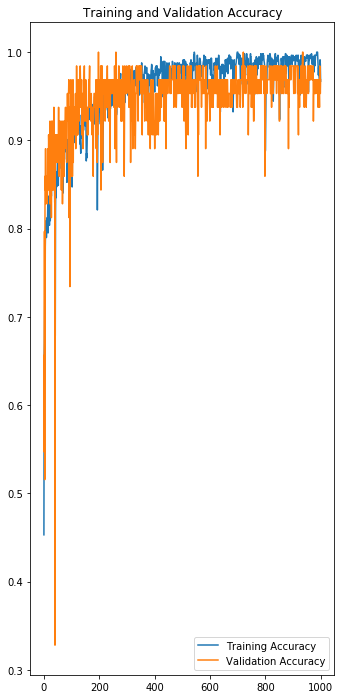

In [22]:
plt.figure(figsize = (12, 12))
plt.subplot(1, 2, 1)
plt.plot(range(EPOCHS), acc, label = 'Training Accuracy')
plt.plot(range(EPOCHS), val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')



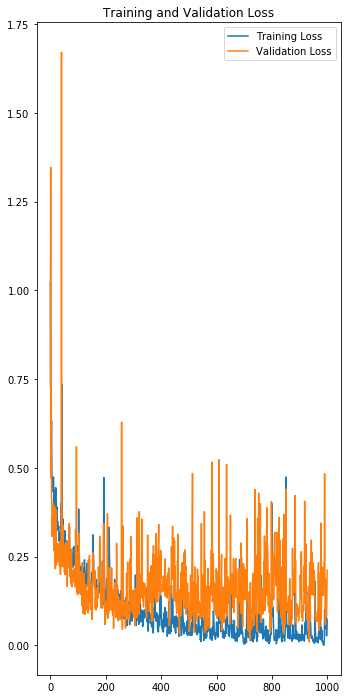

In [23]:
plt.figure(figsize = (12, 12))

plt.subplot(1, 2, 1)
plt.plot(range(EPOCHS), loss, label = 'Training Loss')
plt.plot(range(EPOCHS), val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

In [25]:
import numpy as np
def predict(model, img):
    img_array = tf.keras.preprocessing.image.img_to_array(images[i].numpy())
    img_array = tf.expand_dims(img_array, 0) #create a batch
    
    predictions = model.predict(img_array)
    
    predicted_class = class_names[np.argmax(predictions[0])]
    confidence = round(100 * (np.max(predictions[0])), 2)
    return predicted_class, confidence

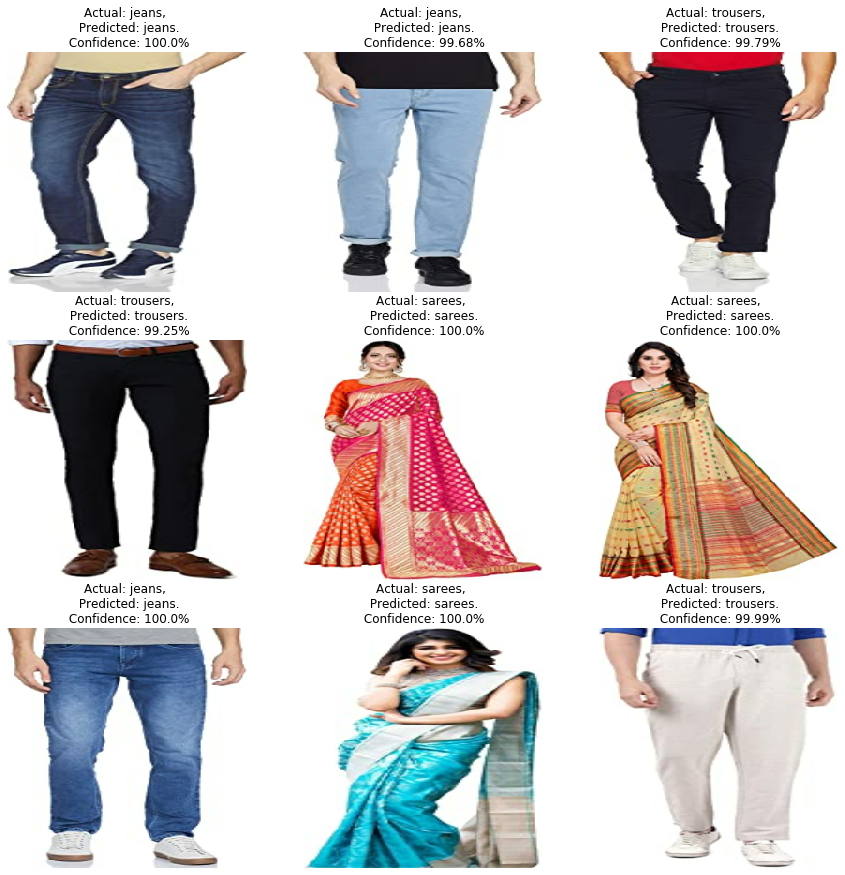

In [26]:
plt.figure(figsize = (15, 15))
for images, labels in test_ds.take(1):
    for i in range(9):
        ax = plt.subplot(3, 3, i + 1)
        plt.imshow(images[i].numpy().astype('uint8'))
        
        predicted_class, confidence = predict(model, images[i].numpy())
        actual_class = class_names[labels[i]]
        
        plt.title(f'Actual: {actual_class}, \n Predicted: {predicted_class}.\n Confidence: {confidence}%')
        plt.axis('off')

In [27]:
model_version = 1
model.save(f'../models/{model_version}')

INFO:tensorflow:Assets written to: ../models/1\assets


In [28]:
import os
model_version = max([int(i) for i in os.listdir('../models') + [0]]) + 1
model.save(f'../models/{model_version}')

INFO:tensorflow:Assets written to: ../models/2\assets
